# Table of Contents
 <p><div class="lev1 toc-item"><a href="#How-to-train-a-NN" data-toc-modified-id="How-to-train-a-NN-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>How to train a NN</a></div><div class="lev2 toc-item"><a href="#Layers,-weights-and-biases" data-toc-modified-id="Layers,-weights-and-biases-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Layers, weights and biases</a></div><div class="lev2 toc-item"><a href="#Training-data-and-a-cost-function" data-toc-modified-id="Training-data-and-a-cost-function-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Training data and a cost function</a></div><div class="lev2 toc-item"><a href="#Stochastic-gradient-descent-and-backpropagation" data-toc-modified-id="Stochastic-gradient-descent-and-backpropagation-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Stochastic gradient descent and backpropagation</a></div><div class="lev2 toc-item"><a href="#$L^2$-regularizaiton" data-toc-modified-id="$L^2$-regularizaiton-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>$L^2$ regularizaiton</a></div><div class="lev1 toc-item"><a href="#A-bad-example-of-gradient-descent" data-toc-modified-id="A-bad-example-of-gradient-descent-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>A bad example of gradient descent</a></div><div class="lev1 toc-item"><a href="#In-batch" data-toc-modified-id="In-batch-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>In batch</a></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# How to train a NN

## Layers, weights and biases
## Training data and a cost function
## Stochastic gradient descent and backpropagation
## $L^2$ regularizaiton

# A bad example of gradient descent

(<matplotlib.collections.PathCollection at 0x10cbd2f98>, (-5, 5))

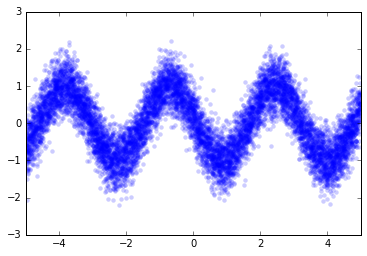

In [2]:
N = 10000
param = [2,3]
x = np.random.rand(N)*10 - 5
noise = np.random.randn(N)*.4
y = np.sin(param[0] * x + param[1]) + noise
plt.scatter(x,y,lw=0, alpha=.2), plt.xlim([-5,5])

$$
F(x; a,b) = \sin(ax+b)\\
C = \frac{1}{2N} \sum_{i=1}^N (y_i - F(x_i; a,b))^2\\
C_a = -\frac{1}{N} \sum_{i=1}^N (y_i - F(x_i; a,b)) F_a(x_i ; a,b) = - \frac{1}{N} \sum_i (y_i - \sin(ax_i + b))\cos(ax_i+b)x_i\\
C_b = \ldots
$$

In [69]:
def train(x, y, p0, epsilon, delta=1e-8, MAX_ITER=1000):
    N = len(y)
    params = np.array(p0)
    a = params[0]
    b = params[1]
    vec = (y-np.sin(a*x + b))*np.cos(a*x + b)
    dCda = (-1/N) * np.sum(vec*x)
    dCdb = (-1/N) * np.sum(vec)
    gradient = np.array([dCda, dCdb])
    params = params - epsilon * gradient
    steps = []
    steps.append(params);
    i = 1
    while np.linalg.norm(gradient) > delta and i < MAX_ITER:
        a = params[0]
        b = params[1]
        vec = (y-np.sin(a*x + b))*np.cos(a*x + b)
        dCda = (-1/N) * np.sum(vec*x)
        dCdb = (-1/N) * np.sum(vec)
        gradient = np.array([dCda, dCdb])
        # print(i, np.linalg.norm(gradient-gradient_old))
        params = params - epsilon * gradient
        steps.append(params)
        i += 1
    print('Exiting loop after %d iterations with Norm(Gradient(f)) = %6.4g' % (i, np.linalg.norm(gradient)))
    return params, np.array(steps)


In [63]:
p, steps = train(x,y, [1,2], epsilon=.1, delta=1e-4, MAX_ITER=3000)

Exiting loop after 698 iterations with Norm(Gradient(f)) = 9.921e-05


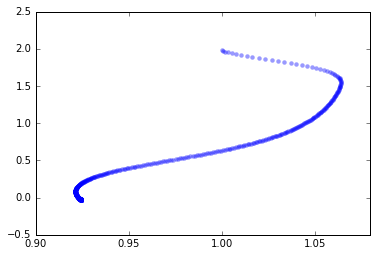

In [64]:
plt.scatter(steps[:,0], steps[:,1], lw=0, alpha=.4)

In [65]:
p

array([ 0.92447526, -0.0301062 ])

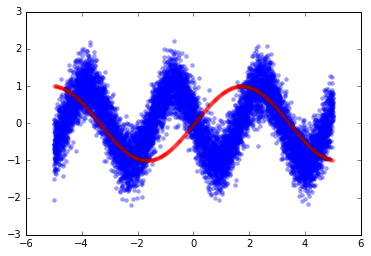

In [66]:
ytest = np.sin(p[0]*x + p[1])
plt.scatter(x,y, lw=0, alpha=.4)
plt.scatter(x,ytest, lw=0, alpha=.01, c='r')

# In batch

In [70]:
def batch_train(x,y, p0vec, epsilon, delta=1e-6, MAX_ITER=1000):
    p = []
    steps = []
    for p0 in p0vec:
        p_out, steps_out = train(x,y, p0, epsilon, delta, MAX_ITER)
        p.append(p_out)
        steps.append(steps_out)
    return p, steps

In [90]:
p0vec = [[1,2], [2,3], [2,4], [2.5,2.5]]
p, steps = batch_train(x,y,p0vec, .1, 1e-6, 1000)

Exiting loop after 1000 iterations with Norm(Gradient(f)) = 2.333e-06
Exiting loop after 164 iterations with Norm(Gradient(f)) = 9.737e-07
Exiting loop after 250 iterations with Norm(Gradient(f)) = 9.937e-07
Exiting loop after 238 iterations with Norm(Gradient(f)) = 9.836e-07


In [98]:
def batch_plot(p_batch, steps_batch):
    plt.hold(True);
    for q, seq in zip(p, steps):
        plt.plot(seq[:,0], seq[:,1]);
        plt.plot(q[0], q[1], 'r', marker='o', markersize=7);

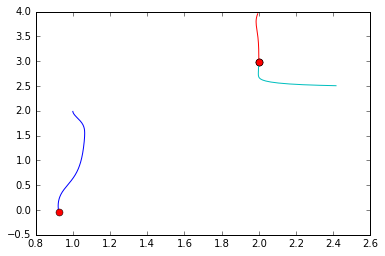

In [99]:
batch_plot(p, steps)